<a href="https://colab.research.google.com/github/pathakharsh123/Fruit_and_vegetable_detection_system/blob/master/Fruit_vegetable_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importing libraries


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Data Preprocessing


#Training Image Preprocessing

In [3]:
training_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/train',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [4]:
validation_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/validation',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building model

In [6]:
cnn = tf.keras.models.Sequential()

##Building convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3])) # convolutional layer -> feature matrix
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   # max pool layer created by scanning the feature matrix to generate 2x2 martrix

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))  # doing it again for extracting only important parametres
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [10]:
cnn.add(tf.keras.layers.Flatten()) # flattening process-flattening our 2x2 matrix

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) # for creating neural network

In [12]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compiling and training Phase

In [13]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30


#Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history # retruns dictonary of training history having loss,accurracy,valid_loss and valid_accuracy as keys and has values corresponding to these key on 30 epochs

{'loss': [11.037175178527832,
  3.9877712726593018,
  3.6469342708587646,
  3.804581642150879,
  4.005517959594727,
  3.418879985809326,
  3.0424301624298096,
  2.8839664459228516,
  2.7260947227478027,
  2.6281707286834717,
  2.284972667694092,
  2.08322811126709,
  2.100942373275757,
  1.9360884428024292,
  2.0899555683135986,
  1.8619413375854492,
  1.6102113723754883,
  1.5357954502105713,
  1.409188151359558,
  1.7588006258010864,
  1.2933005094528198,
  1.415353536605835,
  1.091858148574829,
  1.1560559272766113,
  1.2273313999176025,
  1.1174232959747314,
  0.9617659449577332,
  1.0233428478240967,
  1.0680361986160278,
  0.9123748540878296],
 'accuracy': [0.030818618834018707,
  0.057463884353637695,
  0.073194220662117,
  0.10465489327907562,
  0.1528089940547943,
  0.20545746386051178,
  0.2468699812889099,
  0.3049759268760681,
  0.3589085042476654,
  0.40802568197250366,
  0.45489567518234253,
  0.5117174983024597,
  0.5361155867576599,
  0.5711075663566589,
  0.6176565289

In [ ]:
# recording history in json file
import json
with open('training_hist','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating accuracy achieved on validation set

In [ ]:
print("validation accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation accuracy: 88.88888955116272 %


#Accuracy visualization

## Training visualization

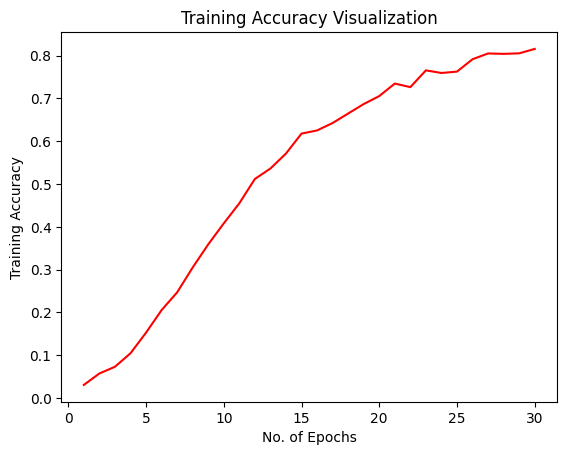

In [ ]:
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Visualization")
plt.show()

##Validation Accuaracy

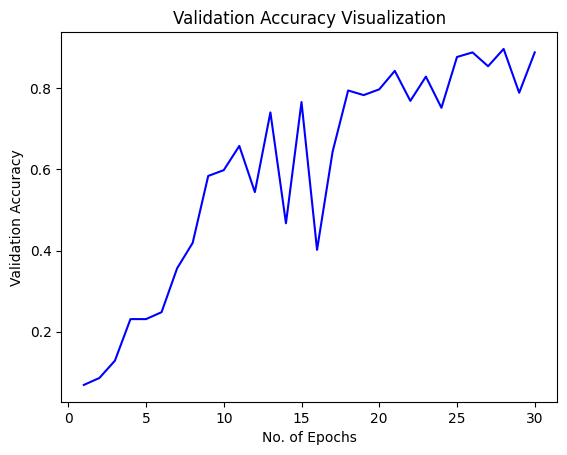

In [ ]:
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Visualization")
plt.show()

#Loading model

In [5]:
loaded_model=  tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /trained_model.h5")

##visualization and Performing prediction on single image

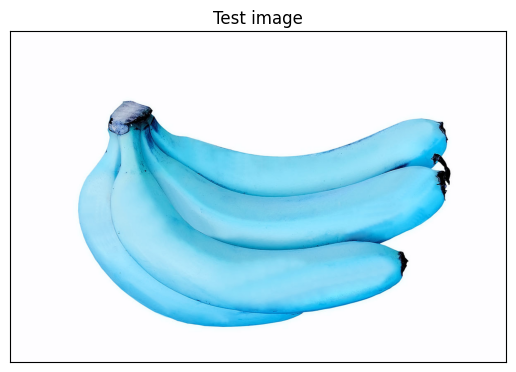

In [29]:
import cv2
img_path= '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/test/banana/Image_1.jpg'
img= cv2.imread(img_path)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

##Testing model

In [30]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(64,64))
input_arr  = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # converting single image to batch
predictions = loaded_model.predict(input_arr)


1/1 [==============================] - 0s 25ms/step


In [31]:
print(predictions)
print(predictions[0])
print(max(predictions[0]))

[[1.6207106e-07 9.9449724e-01 3.9482511e-06 1.1273810e-05 3.5816887e-05
  5.8985734e-06 2.6330199e-05 1.8222896e-04 8.7809934e-07 1.2391569e-03
  7.3674805e-08 4.9557238e-09 1.3059315e-05 2.6023145e-05 4.7906883e-06
  2.4942826e-08 2.2029768e-05 2.4126475e-06 1.2043652e-05 4.2245170e-05
  1.1355608e-06 2.4956796e-06 4.2251395e-06 5.3215178e-04 7.1194154e-06
  1.7190656e-03 3.7095498e-07 8.3888177e-04 4.1740996e-04 2.5642684e-04
  2.3316817e-08 5.8751819e-05 2.6173584e-08 1.4734658e-07 2.0477974e-05
  1.5847667e-05]]
[1.6207106e-07 9.9449724e-01 3.9482511e-06 1.1273810e-05 3.5816887e-05
 5.8985734e-06 2.6330199e-05 1.8222896e-04 8.7809934e-07 1.2391569e-03
 7.3674805e-08 4.9557238e-09 1.3059315e-05 2.6023145e-05 4.7906883e-06
 2.4942826e-08 2.2029768e-05 2.4126475e-06 1.2043652e-05 4.2245170e-05
 1.1355608e-06 2.4956796e-06 4.2251395e-06 5.3215178e-04 7.1194154e-06
 1.7190656e-03 3.7095498e-07 8.3888177e-04 4.1740996e-04 2.5642684e-04
 2.3316817e-08 5.8751819e-05 2.6173584e-08 1.4734658

In [13]:
test_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/test',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [21]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [32]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index[0][0])

1


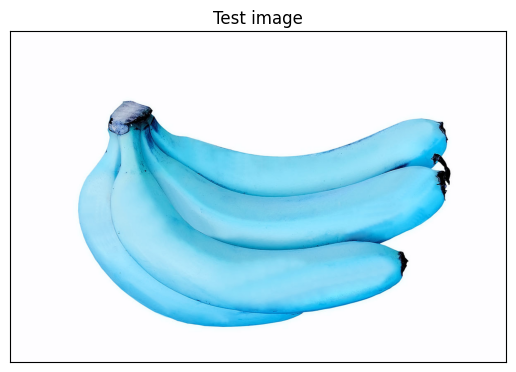

In [33]:
#display Image

plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
print("This is a {}".format(test_set.class_names[result_index[0][0]]))

This is a banana
